In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
exact_column = "exact_data_based"
eps = 0.000001

import utils
input = utils.load_data([
    "../results/synthetic/1000/set1/",
    "../results/synthetic/1000/set2/",
    "../results/synthetic/1000/set4/"
])

# get exact rows
exact_data = input[input.method == "exact_data_based"].copy()
exact_data["identifiable"] = (exact_data.pns_u - exact_data.pns_l).abs() < eps

exact = input[input.method == "exact"].copy()
exact["identifiable"] = (exact.pns_u - exact.pns_l).abs() < eps

full_data_emcc = input[(input.method == "EMCC") & (input['index'] == 10) & input.selector].copy()
full_data_emcc["identifiable"] = (full_data_emcc.pns_u - full_data_emcc.pns_l).abs() < eps

In [ ]:
input.shape

In [ ]:
def plot_box(data3, bins, by, key, value, l=-0.25, u=1, exact_model = True):
    import math
    fig, ax = plt.subplots(2,1, figsize=(15,15))

    axu = data3.boxplot("r_pns_u", by=by,  ax=ax[0])
    axl = data3.boxplot("r_pns_l", by=by,  ax=ax[1])

    axu.set_title("difference with exact upper")
    axl.set_title("difference with exact lower")

    l= math.floor(l * 5) / 5
    u = math.ceil(u * 5) / 5
    
    axu.set_ylim(l,u)
    axl.set_ylim(l,u)

    fig.suptitle(f"Errors on Pns by discretized Ps1. {key} == {value}")
    if exact_model:
        ex = "emodel"
    else:
        ex = "edata"
    
    fig.savefig(f"plots/error_{ex}_by_{bins}_{by}_{key}_{value}.jpg")
    plt.close()


In [ ]:
groups = {
    "num_endogenous": input.num_endogenous.unique(), 
    "markovianity": input.markovianity.unique(), 
    "network_type":input.network_type.unique(),
    "identifiable": [True, False]
}

In [4]:
binss= [5]
bys = ["quant_ps1", "disc_ps1"]

In [ ]:
input[input.network_type =="rand13"].method.unique()

In [ ]:
# add excat column to all rows
e = True
for exact_df in [exact, exact_data]:
    data = input.merge(exact_df[["file", "identifiable", "pns_l", "pns_u"]], on="file")
    data = data[(data.method=="EMCC") & (data.selector)]

    data["r_pns_l"] = (data.pns_l_x - data.pns_l_y)
    data["r_pns_u"] = (data.pns_u_x - data.pns_u_y)

    lower = data["r_pns_l"].min()
    upper = data["r_pns_u"].max()
    data2 = data

    for bins in binss:
        # discretize
        data2["disc_ps1"] = pd.cut(data2.ps1, bins=bins)
        data2["quant_ps1"] = pd.qcut(data2.ps1, q=bins, duplicates="drop")


        for by in bys:

            plot_box(data2, bins, by, "All", "All")

            for key in groups:
                for value in groups[key]:

                    filter = data2[key] == value
                    plot_box(data2[filter], bins, by, key, value, lower, upper, e)
    e = False


# Exploring

In [5]:
data = input.merge(exact_data[["file", "identifiable", "pns_l", "pns_u"]], on="file")
data = data[(data.method=="EMCC") & (data.selector) & (data.network_type =="rand13")]
data["r_pns_l"] = (data.pns_l_x - data.pns_l_y)
data["r_pns_u"] = (data.pns_u_x - data.pns_u_y)

<AxesSubplot:xlabel='ps1', ylabel='r_pns_u'>

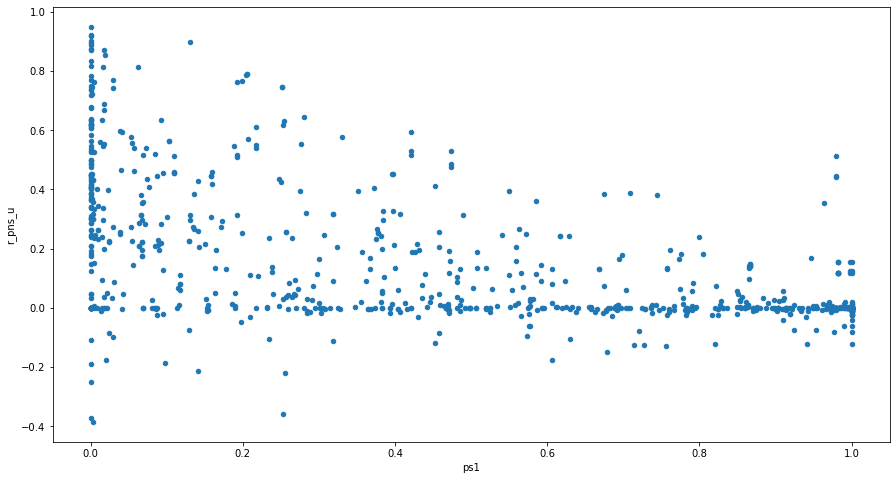

In [9]:
data.plot.scatter("ps1", "r_pns_u", figsize=(15,8))

In [ ]:
data["trs"] = data[[f"trajectory_size_{i}" for i in range(30)]].min(axis=1)

In [ ]:
d = data[data.r_pns_u < -0.2]
for i in range(d.shape[0]):
    print(d[["pns_u_x", "pns_l_y", "ps1",  "pns_u_y", "trs", "file"] + [ f"pns_{i}" for i in range(30)]].file.str.split("/").iloc[i])
d[["pns_u_x", "pns_l_y", "ps1",  "pns_u_y", "trs"]]

In [155]:
plt.close()

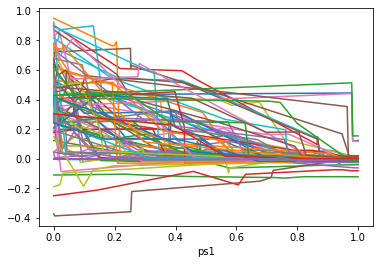

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = data
fig, ax = plt.subplots()

for key, grp in df.groupby(['file']):
    ax = grp.plot(ax=ax,  x='ps1', y='r_pns_u')

ax.get_legend().remove()
plt.show()
plt.close()

In [160]:
xx = data.merge(data[["r_pns_u", "file", "ps1"]].groupby("file").agg({"r_pns_u":min}), on=["file", "r_pns_u"])

In [ ]:
xx.boxplot("r_pns_u")

# Time plots

In [ ]:
sel = data[(data.method=="EMCC") & ( data.selector)]
ps1 = data[(data.method=="EMCC") & (~data.selector)]

data2 = sel.merge(ps1[["file", 'time_pns', 'time_ace', 'time_learn']], on="file")
data2['r_time_pns'] = data2["time_pns_x"]/data2["time_pns_y"]
data2['r_time_ace'] = data2["time_ace_x"]/data2["time_ace_y"]
data2['r_time_learn'] = data2["time_learn_x"]/data2["time_learn_y"]


In [ ]:
data2[data2.markovianity == "quasi-markovian"].plot.scatter("ps1", "r_time_learn")
plt.savefig("plots/r_time_learn.jpg")
plt.close()

data2[data2.markovianity == "quasi-markovian"].plot.scatter("ps1", "r_time_pns")
plt.savefig("plots/r_time_pns.jpg")
plt.close()

In [ ]:
data2.groupby("num_endogenous")['r_time_learn'].describe().T


In [ ]:
data.columns

In [ ]:
data.num_endogenous.unique()